In [17]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

devices = ['hc-20', 'hc-21', 'hc-42'] #hc-26
device_names = ["Pi 3B+", "Pi 4B", "SiFive VF2"] #"Le Potato"

In [18]:
def get_results(filename):
    with open(filename, "r") as f:
        data = [k[:-1].split(',') for k in f.readlines()]
    return list(zip(*data))

def get_arr_data(filename):
    with open(filename, "r") as f:
        cont = np.array(f.read().split(',')[:-1], dtype=int)
    return cont

data = {}
comp_dir = Path("compute_results")
pub_dir = Path("pub_times")
for device in devices:
    local_idx, local, local_sum = get_results(comp_dir / f"{device}-local.results")
    offload_idx, offload, offload_sum = get_results(comp_dir / f"{device}-offload.results")
    
    if (local_sum != offload_sum):
        print(f"Error in sum result for {device}")
    else:
        print(local, offload)

    if (local_idx != offload_idx):
        print(f"Error in idx for {device}")
        
    data[device] = {}
    data[device]["idx"] = np.array(local_idx, dtype=int)
    data[device]["local"] = np.array(local, dtype=int)
    data[device]["offload"] = np.array(offload, dtype=int)
    data[device]["pub_latency"] = get_arr_data(pub_dir / f"{device}-pubtimes.results")
    data[device]["ch_latency"] = get_arr_data(pub_dir / f"{device}-chwrite.results")
print(data)

('66', '153', '308', '570', '942', '1527', '2176', '2968', '4097', '5423', '6974', '9000', '11012', '13454', '16340', '19616', '23159', '27236', '31762', '36799', '42212', '48189', '54742', '61712', '69471', '77854', '87188', '96526', '106714', '118021', '129319', '142308', '155593', '169717', '184205', '200313', '216984', '234569', '252974', '272488', '293330', '314676', '336979', '360162', '384593', '411199', '437499', '466982', '494840', '524995') ('12075', '12136', '12228', '11623', '12121', '12122', '12133', '12867', '12491', '12283', '12503', '12553', '12746', '12874', '13064', '13261', '13317', '13701', '13684', '14515', '14509', '15065', '15605', '16008', '16151', '17183', '17801', '18102', '18612', '19537', '19777', '21113', '21528', '22032', '23233', '24600', '25301', '26211', '27881', '28554', '29802', '31054', '32443', '34578', '35747', '36852', '38360', '40442', '42466', '43589')
('48', '100', '184', '318', '532', '703', '1005', '1318', '1741', '2253', '2943', '3565', '440

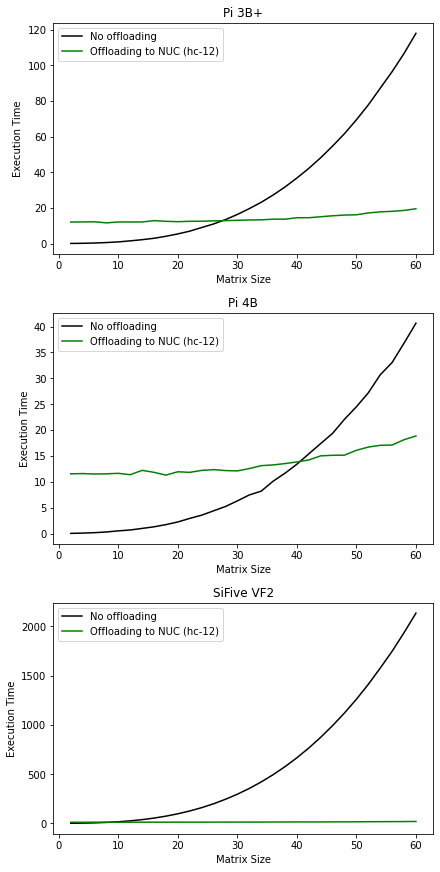

In [19]:
fig, ax = plt.subplots(len(devices), 1, figsize=(6, 4 * len(devices)), constrained_layout=True)
b = 20
i = 0
for device, ft in data.items():
    ax[i].plot(ft["idx"][:-b], ft["local"][:-b]/1000, color='k')
    ax[i].plot(ft["idx"][:-b], ft["offload"][:-b]/1000, color='g')
    ax[i].legend(["No offloading", "Offloading to NUC (hc-12)"])
    ax[i].set_ylabel("Execution Time")
    ax[i].set_xlabel("Matrix Size")
    ax[i].set_title(device_names[i])
    i += 1

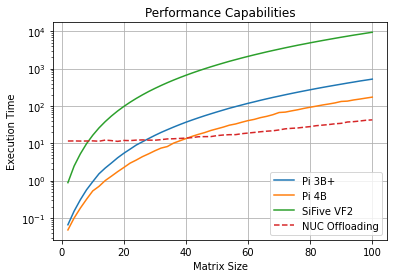

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
server_time = data["hc-21"]["offload"]/1000
for device, ft in data.items():
    ax.plot(ft["idx"], ft["local"]/1000)
    
#server_ft = data["hc-12"]
#ax.plot(server_ft["idx"][:-b], server_ft["local"][:-b]/1000, '--')
ax.plot(data["hc-21"]["idx"], server_time, '--')
ax.set_title("Performance Capabilities")
ax.legend(device_names + ["NUC Offloading"])
ax.set_ylabel("Execution Time")
ax.set_xlabel("Matrix Size")
ax.set_yscale('log')
ax.grid()


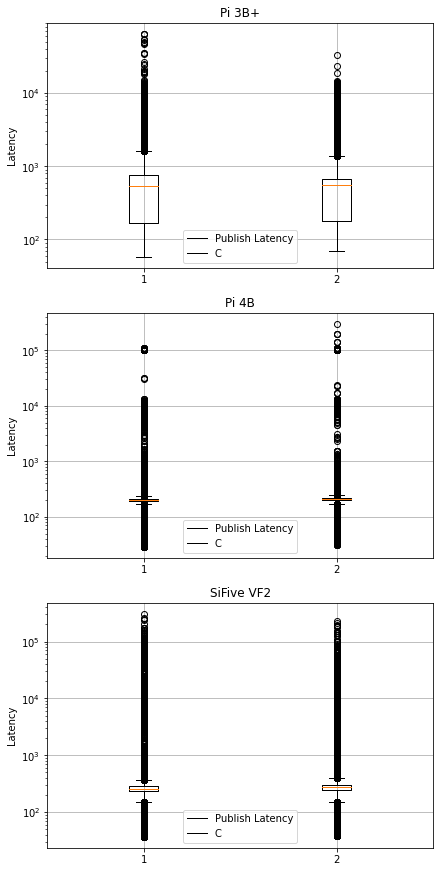

In [35]:
fig, ax = plt.subplots(len(devices), 1, figsize=(6, 4*len(devices)), constrained_layout=True)
i = 0
for device, ft in data.items():
    ax[i].boxplot([ft["pub_latency"], ft["ch_latency"]])
    ax[i].legend(["Publish Latency", "C"])
    ax[i].set_ylabel("Latency")
    ax[i].set_xlabel("Target Device")
    ax[i].set_title(device_names[i])
    ax[i].set_yscale('log')
    ax[i].grid()
    i += 1